In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("/content/loan_dataset.csv")

In [5]:
print(df.head())

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


In [6]:
print(df.shape)

(614, 13)


In [7]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [10]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [16]:
df['Loan_Status']=df['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)

In [17]:
print(df['Loan_Status'])

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [18]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 52.5+ KB


In [22]:
df['Dependents']=df['Dependents'].apply(lambda x:4 if x=='3+' else x)

In [24]:
print(df['Dependents'].value_counts())

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

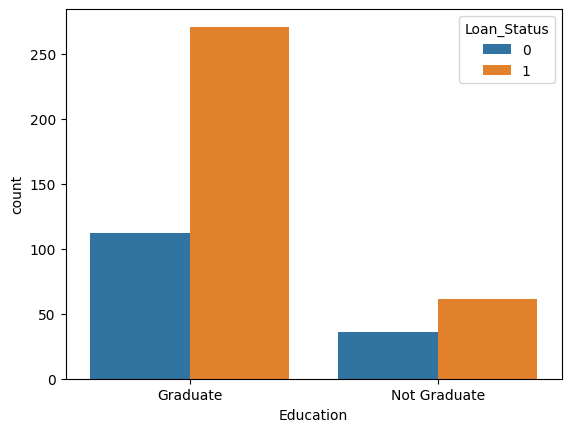

In [31]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Education',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

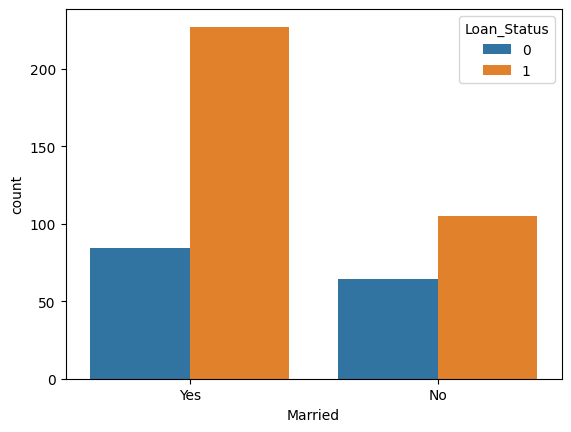

In [32]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Married',hue='Loan_Status')

In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Credit_History', ylabel='count'>

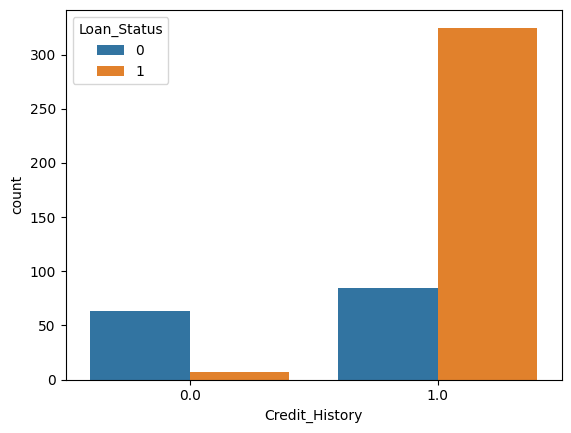

In [37]:
sns.countplot(data=df,x='Credit_History',hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

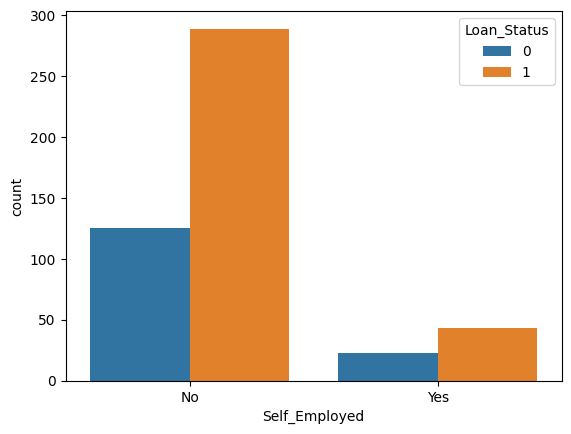

In [38]:
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

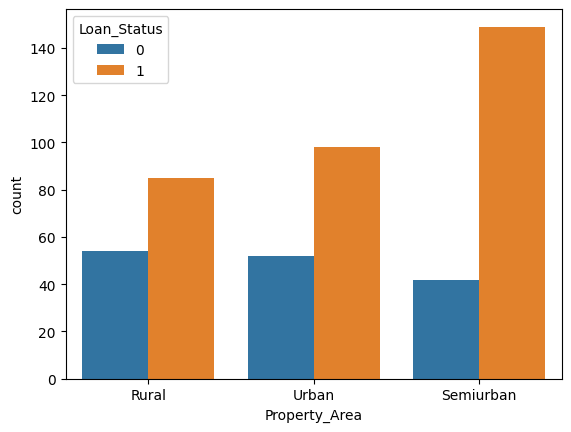

In [39]:
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

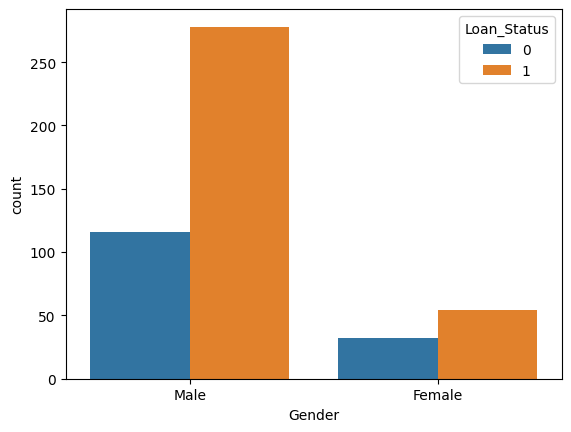

In [41]:
sns.countplot(data=df,x='Gender',hue='Loan_Status')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 52.5+ KB


In [46]:
df['Dependents']=df['Dependents'].astype(int)

In [49]:
df.info()
print(df['Gender'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 52.5+ KB
Gender
Male      394
Female     86
Name: count, dtype: int64


In [50]:
df['Gender']=df['Gender'].apply(lambda x: 1  if x=='Male' else 0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 52.5+ KB


In [52]:
df['Married']=df['Married'].apply(lambda x: 1 if x=='Yes' else 0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 52.5+ KB


In [54]:
df['Education']=df['Education'].apply(lambda x: 1 if x=='Graduate' else 0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 52.5+ KB


In [56]:
df['Self_Employed']=df['Self_Employed'].apply(lambda x: 1 if x=='Yes' else 0)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
 13  Propert_Area       480 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 72.4+ KB


In [61]:
df.replace({"Property_Area":{"Urban":2,"Semiurban":1,"Rural":0}},inplace=True)

/tmp/ipython-input-61-3092839679.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Property_Area":{"Urban":2,"Semiurban":1,"Rural":0}},inplace=True)


In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Propert_Area
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,0


In [64]:
X=df.drop(columns=['Loan_ID','Loan_Status'])

In [65]:
Y=df['Loan_Status']

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [69]:
model=svm.SVC(kernel='linear')

In [70]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [71]:
# accuracy on training data
train_prediction=model.predict(X_train)

In [72]:
acc_train=accuracy_score(train_prediction,Y_train)

In [73]:
print(acc_train)

0.7986111111111112


In [74]:
test_prediction=model.predict(X_test)

In [75]:
acc_test=model.predict(X_test)

In [76]:
acc_test1=accuracy_score(acc_test,Y_test)

In [77]:
print(acc_test1)

0.8333333333333334


In [79]:
import pickle
pickle.dump(model,open('loan.pkl','wb'))

In [82]:
from sklearn.decomposition import PCA

# Reduce X to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM on PCA-transformed features
pca_model = svm.SVC(kernel='linear')
pca_model.fit(X_pca, Y)

# Now use similar plotting code with X_pca


SVC(kernel='linear')

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

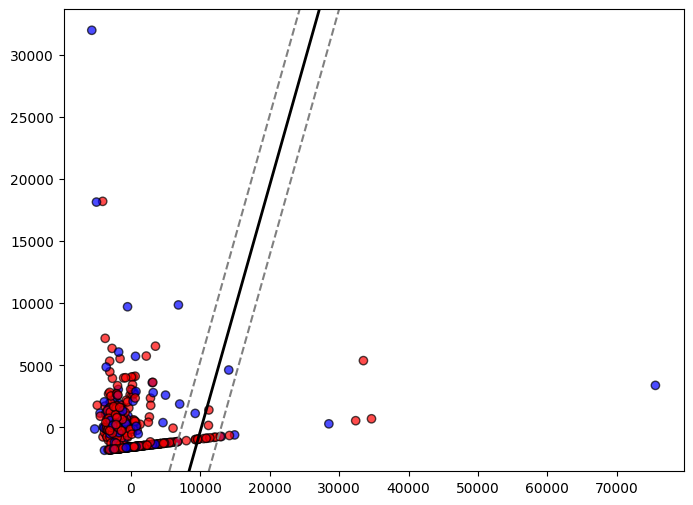

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of PCA-reduced data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='bwr', edgecolors='k', alpha=0.7)

# Create grid
xlim = plt.xlim()
ylim = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

# Flatten the grid and predict
xy = np.c_[xx.ravel(), yy.ravel()]
Z = pca_model.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')         # Decision boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='dashed', colors='grey')  # Margins

# Axis labels and title
plt.xlabel
